In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


1. Implementing Sigmoid Function:

In [113]:
def logistic_function(x):
  y= 1/(1+np.exp(-x))
  return y

In [ ]:
def test_logistic_function():
  x_scalar= 0
  expected_output_scalar= round(1 / (1 + np.exp(0)), 3)
  assert round(logistic_function((x_scalar)),3)== expected_output_scalar ,'test failed for scalar input'

  x_pos= 2
  expected_output_pos = round(1 / (1 + np.exp(-2)), 3) # Expected output: ~0.881
  assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalarinput"


  x_neg = -3
  expected_output_neg = round(1 / (1 + np.exp(3)), 3) # Expected output: ~0.047
  assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar"
  # Test with numpy array input
x_array = np.array([0, 2, -3])
expected_output_array = np.array([0.5, 0.881, 0.047]) # Adjusted expected values rounded to 3 decimals
# Use np.round to round the array element-wise and compare
assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for"

print("All tests passed!")
test_logistic_function()

All tests passed!


2. Implementing Log Loss Function:

In [114]:
def log_loss(y_true, y_pred):
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  # print(y_pred)
  loss= -y_true*np.log(y_pred)- (1-y_true)*np.log(1-y_pred)
  return loss

In [115]:
# Test function:
y_true, y_pred = 0, 1

print(f"log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")
print("+++++++++++++--------------------------++++++++++++++++++++++++")
y_true, y_pred = 1, 0.7
print(f"log loss({y_true}, {y_pred}) ==> {log_loss(y_true, y_pred)}")

0.9999999999
log loss(0, 1) ==> 23.02585084720009
+++++++++++++--------------------------++++++++++++++++++++++++
0.7
log loss(1, 0.7) ==> 0.35667494393873245


In [116]:
def test_log_loss():
  y_true= 1
  y_pred= 1
  expected_loss= 0.0
  assert np.isclose(log_loss(y_true, y_pred), expected_loss),"test failed for y_true= 1 and y_pred= 1 "
  print("sucessfull 1")

  y_true= 0
  y_pred= 0
  expected_loss= 0.0
  assert np.isclose(log_loss(y_true, y_pred), expected_loss),"test failed for y_true= 0 and y_pred= 0 "
  print("sucessfull 2")


  y_true = 1
  y_pred = 0

  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)

# Test case 4: Incorrect prediction (y_true = 0, y_pred = 1)
  y_true = 0
  y_pred = 1
  try:
    log_loss(y_true, y_pred) # This should raise an error due to log(0)
  except ValueError:
    pass # Test passed if ValueError is raised for log(0)
  y_true = 1
  y_pred = 0.8
  expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partiallycorrect prediction (y_true=1, y_pred=0.8)"
  y_true = 0
  y_pred = 0.2
  expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8)) # ~0.2231
  assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partiallycorrect prediction (y_true=0, y_pred=0.2)"
  print("All test passed")



test_log_loss()

0.9999999999
sucessfull 1
1e-10
sucessfull 2
1e-10
0.9999999999
0.8
0.2
All test passed


3. Implementing Cost Function:

In [117]:
def cost_function(y_true, y_pred):
  assert len(y_true)==len(y_pred),"length of value and predicted must be equal"
  n= len(y_true)
  loss_vec=log_loss(y_true, y_pred)
  cost= np.sum(loss_vec)/ n
  return cost


# testing the cost function
def test_cost_function():
  y_true=np.array([1,0,1])
  y_pred= np.array([0.9,0.1,0.8])

  expected_cost = (-(1 * np.log(0.9)) - (1 - 1) * np.log(1 - 0.9) +
  -(0 * np.log(0.1)) - (1 - 0) * np.log(1 - 0.1) +
  -(1 * np.log(0.8)) - (1 - 1) * np.log(1 - 0.8)) / 3

  result= cost_function(y_true,y_pred)
  # print(result,'result is ')
  # print(expected_cost,'expected_cost is ')
  assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
  print("Test passed for simple case!")
test_cost_function()


[0.9 0.1 0.8]
Test passed for simple case!


4. Extending the cost function for sigmoid regression to be used with model parameters.

formula:
yˆ = σ
x · w
T + b

=
1/
1 + e
−(x·wT +b)


ycap= σ(z)= 1/1+e**(x*W.T)

In [118]:
def costfunction_logreg(X,Y,W,B):
  # print(X.shape,"X")
  # print(Y.shape,"Y")
  # print(W.shape,"W")
  # n= rows
  # d= columns
  n,d= X.shape
  # print('n',n)
  # print('d',d)

  assert len(Y)==n,"Number of feature observations and number of target observations do not match."
  assert len(W) == d, "Number of features and number of weight parameters do not match."
  Z= np.dot(X,W)+B
  y_pred= 1/(1+np.exp(-Z))
  cost= cost_function(Y,y_pred)
  return cost

X=np.array([[10, 20], [-10, 10]])
Y=np.array([1, 0])
W=np.array([0.5, 1.5])
B=1
print(f"the cost function is {costfunction_logreg(X,Y,W,B):.4f}")
print(X)

[1.        0.9999833]
the cost function is 5.5000
[[ 10  20]
 [-10  10]]


5. Implementing Gradient Descent for Training Sigmoid Regression:

TODo 5

In [121]:
def compute_gradient(X,Y,W,B):
  # print(X.shape,"X")
  # print(Y.shape,"Y")

  # print(W.shape,"W")

  n,d= X.shape
  M= len(Y)
  assert len(Y)==n ,"y and n dont have equal length means label are not equal according to row "
  assert len(W)==d,"w and d dont have equal length means weight is not equal to all columns"
  Z= np.dot(X,W)+B
  y_pred= 1/(1+np.exp(-Z))
  error= y_pred -Y
  dot_product= np.dot(X.T ,error)
  grad_W= (((dot_product)))/M

  grad_B= (np.sum(error))/M
  return grad_W, grad_B




X = np.array([[10, 20], [-10, 10]]) # shape (2, 2)
Y = np.array([1, 0]) # shape (2,)
W = np.array([0.5, 1.5]) # shape (2,)
B = 1 # scalar

try:
  grad_w, grad_b = compute_gradient(X, Y,W, B)
  print("Gradients computed successfully.")
  print(f"grad_w: {grad_w}")
  print(f"grad_b: {grad_b:.4f}")
except AssertionError as e:
  print(f"Assertion error: {e}")

Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.5000


5.2 Gradient Descent for Sigmoid Regression:

6. Task To Do:

In [153]:
def gradient_descent(X,Y,W,B,alpha,n_iter, show_cost=False, show_params=False):
  n,d= X.shape
  assert len(Y)==n ,"y and n dont have equal length means label are not equal according to row "
  assert len(W)==d,"w and d dont have equal length means weight is not equal to all columns"
  cost_history= []
  params_history= []
  w_update= W.copy()
  i_values= []

  for i in range(n_iter):
    i_values.append(i)
    Z= (np.dot(X, w_update) + B)
    y_pred = 1 / (1 + np.exp(-Z))

    grad_w,grad_b= compute_gradient(X,Y,w_update,B)
    w_update= w_update- alpha * grad_w
    B= B- alpha *grad_b
    cost= cost_function(Y, y_pred)
    cost_history.append(cost)
    params_history.append((w_update.copy(),B))
  # if show_cost and (i % 100 == 0 or i == n_iter - 1):
  #   print(f"Iteration {i}: Cost = {cost:.6f}")
  # if show_params and (i % 100 == 0 or i == n_iter - 1):
  #   print(f"Iteration {i}: w = {w_update}, b = {b_update:.6f}")


  return w_update, B , cost_history,params_history,i_values




x = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(x.shape[1])
print(w)
b= 0.0
alpha= 0.1
n_iter= 10

w_update, b_update , cost_history,params_history,i_values= gradient_descent(x,y,w,b,alpha,n_iter)
print("\nFinal parameters:")
print(f"w: {w_update}, b: {b_update}")
print(f"Final cost: {cost_history[-1]:.6f}")

[0. 0.]
[0.5 0.5]
[0.50025   0.4999375]
[0.50049751 0.49987264]
[0.50074259 0.49980548]
[0.50098529 0.49973609]
[0.50122569 0.49966451]
[0.50146384 0.49959082]
[0.50169979 0.49951505]
[0.5019336  0.49943728]
[0.50216532 0.49935754]

Final parameters:
w: [0.04992977 0.02490578], b: -0.0003940271565855719
Final cost: 0.690344


In [146]:
#testig for gradient descent
def test_gradient_descent():
  x= np.array([[0.1, 0.2], [-0.1, 0.1]])
  y = np.array([1, 0])
  w= np.zeros(x.shape[1])
  print(w)
  b=0.0
  alpha = 0.1
  n_itr=  102
  w_out, b_out, cost_history,params_history= gradient_descent(x,y,w,b,alpha,n_itr,show_cost=False,show_params=False)

  assert len(cost_history) == n_itr, "Cost history length does not match the number of iterations"
  assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
  assert isinstance(b_out, float), "Bias output is not a float"
  assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
  print(f'final cost function is {cost_history[-1]}')
  print(f'second last  cost function is {cost_history[-2]}')
  print(f"difference in cost function {cost_history[-2]- cost_history[-1]:.4f}")
  print("All tests passed!")
test_gradient_descent()


[0. 0.]
[0.5 0.5]
[0.50025   0.4999375]
[0.50049751 0.49987264]
[0.50074259 0.49980548]
[0.50098529 0.49973609]
[0.50122569 0.49966451]
[0.50146384 0.49959082]
[0.50169979 0.49951505]
[0.5019336  0.49943728]
[0.50216532 0.49935754]
[0.50239501 0.49927589]
[0.50262271 0.49919239]
[0.50284848 0.49910708]
[0.50307235 0.49902   ]
[0.50329439 0.49893121]
[0.50351464 0.49884074]
[0.50373313 0.49874865]
[0.50394992 0.49865497]
[0.50416504 0.49855976]
[0.50437855 0.49846304]
[0.50459046 0.49836485]
[0.50480084 0.49826525]
[0.50500971 0.49816426]
[0.50521711 0.49806192]
[0.50542308 0.49795826]
[0.50562766 0.49785333]
[0.50583087 0.49774715]
[0.50603275 0.49763977]
[0.50623334 0.4975312 ]
[0.50643266 0.49742148]
[0.50663076 0.49731065]
[0.50682764 0.49719873]
[0.50702336 0.49708575]
[0.50721793 0.49697174]
[0.50741139 0.49685673]
[0.50760375 0.49674074]
[0.50779506 0.4966238 ]
[0.50798532 0.49650594]
[0.50817458 0.49638718]
[0.50836285 0.49626755]
[0.50855015 0.49614706]
[0.50873652 0.49602575]


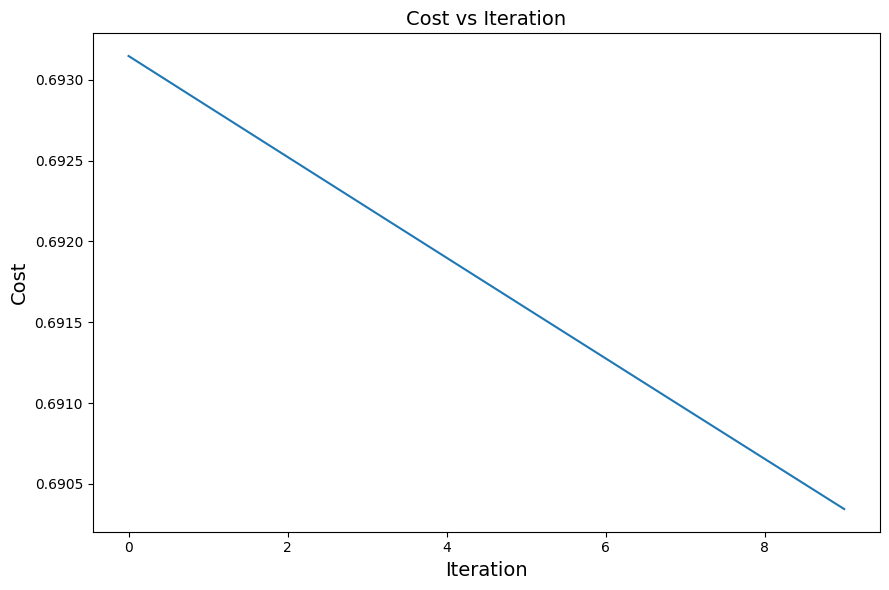

In [156]:
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()